# Exploratory Data Analysis - House Prices

## Importing libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Defining functions

In [72]:
def plot_multiple_charts(dataframe):
    cols = dataframe.columns
    number_of_cols = len(cols)
    ax_n_cols = 4
    ax_n_rows = number_of_cols / 4 if number_of_cols % 4 == 0 \
        else int(number_of_cols / ax_n_cols) + 1
    fig, axs = plt.subplots(nrows=ax_n_rows, ncols=4, figsize=(20, 40),
                            layout='constrained');

    i = 0
    for row in range(ax_n_rows):
        for col in range(ax_n_cols):
            ax = axs[row, col]
            if i < number_of_cols:
                sns.countplot(dataframe, ax=ax, x=cols[i]);
                ax.set_title(cols[i])
            else:
                ax.set_axis_off()
            i = i +1

## Loading data

In [2]:
if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    # Kaggle-specific configuration
    TEST_PATH = Path('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
    TRAIN_PATH = Path('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
else:
    # Local configuration
    TEST_PATH = Path('data/test.csv')
    TRAIN_PATH = Path('data/train.csv')

house_prices_test_df = pd.read_csv(TEST_PATH)
house_prices_train_df = pd.read_csv(TRAIN_PATH)

In [3]:
print('Full train dataset shape is {} rows and {} columns.'.format(house_prices_train_df.shape[0], house_prices_train_df.shape[1]))

Full train dataset shape is 1460 rows and 81 columns.


In [4]:
house_prices_train_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
house_prices_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house_prices_col_types = house_prices_train_df.dtypes.rename('Types')
house_prices_col_unique_values = house_prices_train_df.nunique().rename('DistinctValues')
types_and_unique_values = pd.concat([house_prices_col_types, house_prices_col_unique_values], axis=1)
types_and_unique_values

,Types,DistinctValues
Id,int64,1460
MSSubClass,int64,15
MSZoning,object,5
LotFrontage,float64,110
LotArea,int64,1073
Street,object,2
Alley,object,2
LotShape,object,4
LandContour,object,4
Utilities,object,2


There are some numeric columns with a few number of unique items. I will understand what is within them.

Let's understand how is the distribution of numeric columns:

In [7]:
numeric_unique_values = types_and_unique_values[types_and_unique_values['Types'] != 'object']
numeric_unique_values.sort_values(ascending=False, by='DistinctValues')

,Types,DistinctValues
Id,int64,1460
LotArea,int64,1073
GrLivArea,int64,861
BsmtUnfSF,int64,780
1stFlrSF,int64,753
TotalBsmtSF,int64,721
SalePrice,int64,663
BsmtFinSF1,int64,637
GarageArea,int64,441
2ndFlrSF,int64,417


<p>I will separate these numeric features with a low quantity of distinct values in a variable.</p>
<p>I will use it later to plot specific charts for these ones.</p>
<p>I will consider a low value every feature that has 24 or less distinct values.
    
The numerical features with low number of distinct values will be treated as categorical in the same way of ones `object` type.

In [15]:
condition_low_number_distinct_values = numeric_unique_values.DistinctValues <= 24
low_number_of_distinct_value_numeric_features = numeric_unique_values[condition_low_number_distinct_values].index.to_list()
numeric_features = numeric_unique_values[~condition_low_number_distinct_values].index.to_list()
object_features =  house_prices_train_df.select_dtypes(include=['object']).columns.to_list()
categorical_features = object_features + low_number_of_distinct_value_numeric_features

There are 81 columns, where:
- One column is `Id`, it will be dropped;
- `SalePrice` is the target column;
- All other 79 columns are features that will be possibly used in the model.

In [9]:
target_column = 'SalesPrice'
house_prices_train_df = house_prices_train_df.drop('Id', axis=1)
numeric_features = [feature_name for feature_name in numeric_features if feature_name not in (target_column, 'Id')]

## Target: Sales Price

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Figure size 1000x700 with 0 Axes>

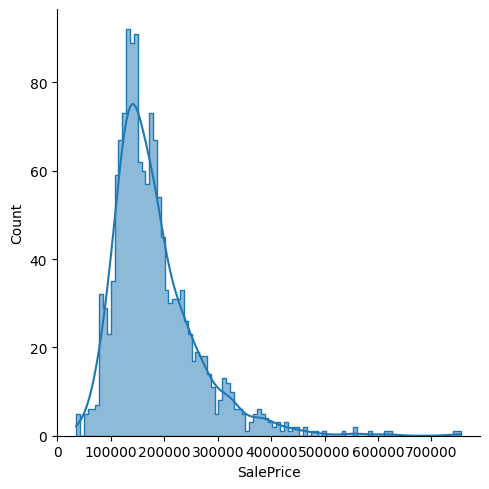

In [44]:
print(house_prices_train_df['SalePrice'].describe())
plt.figure(figsize=(10,7))
sns.displot(house_prices_train_df['SalePrice'], bins=100, kde=True, element='step');

## Numerical Features Distribution

In [10]:
num_features_house_prices = house_prices_train_df[numeric_features]
num_features_house_prices.head(2)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,1710,2003.0,548,0,61,0,0,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,1262,1976.0,460,298,0,0,0,181500


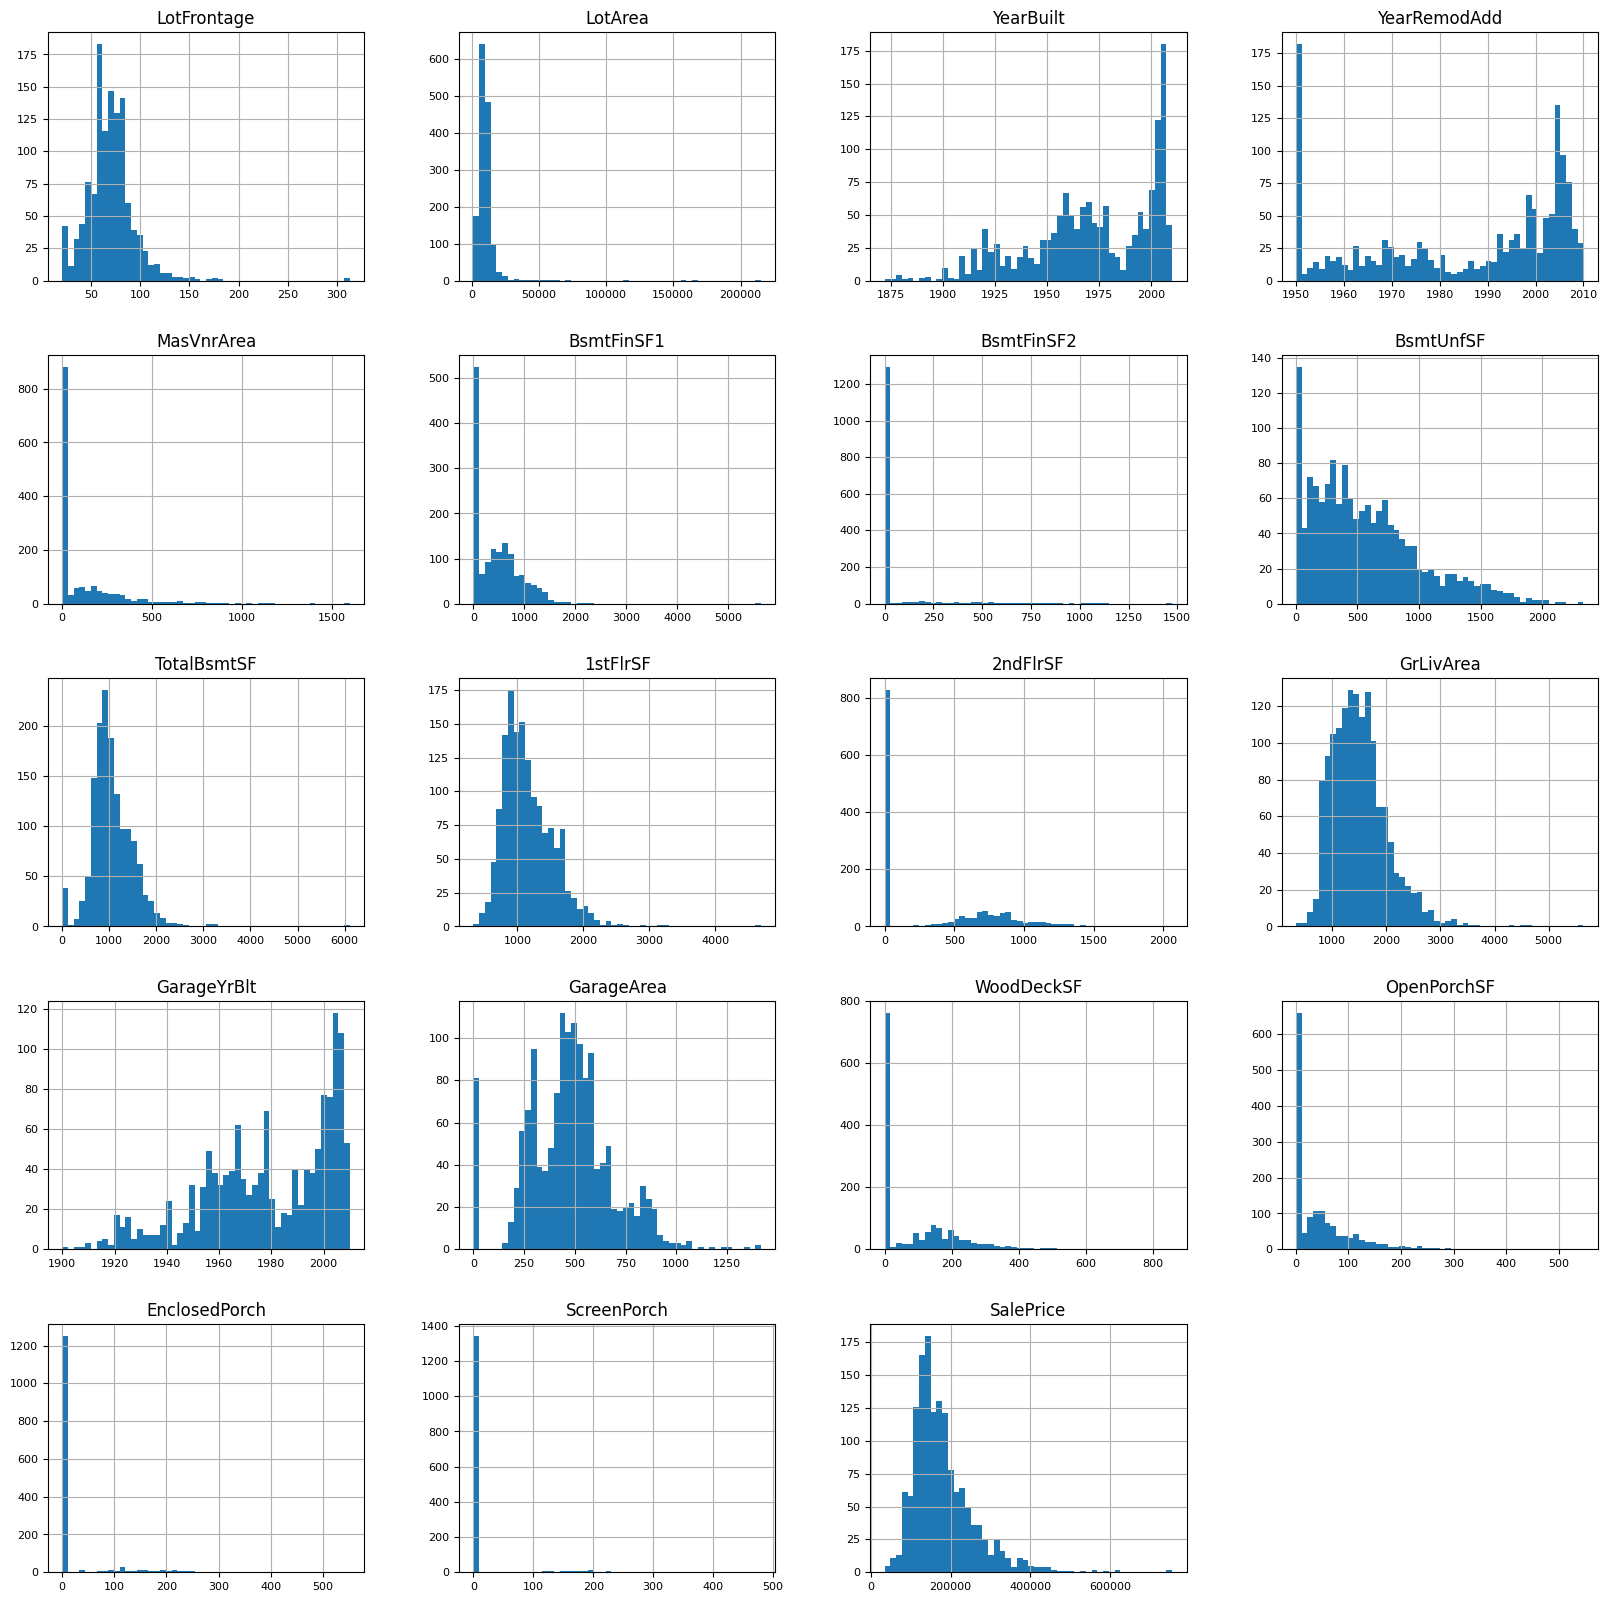

In [11]:
num_features_house_prices.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8);

## Categorical Features Distribution

In [33]:
cat_features_house_prices = house_prices_train_df[categorical_features]
cat_features_house_prices.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007


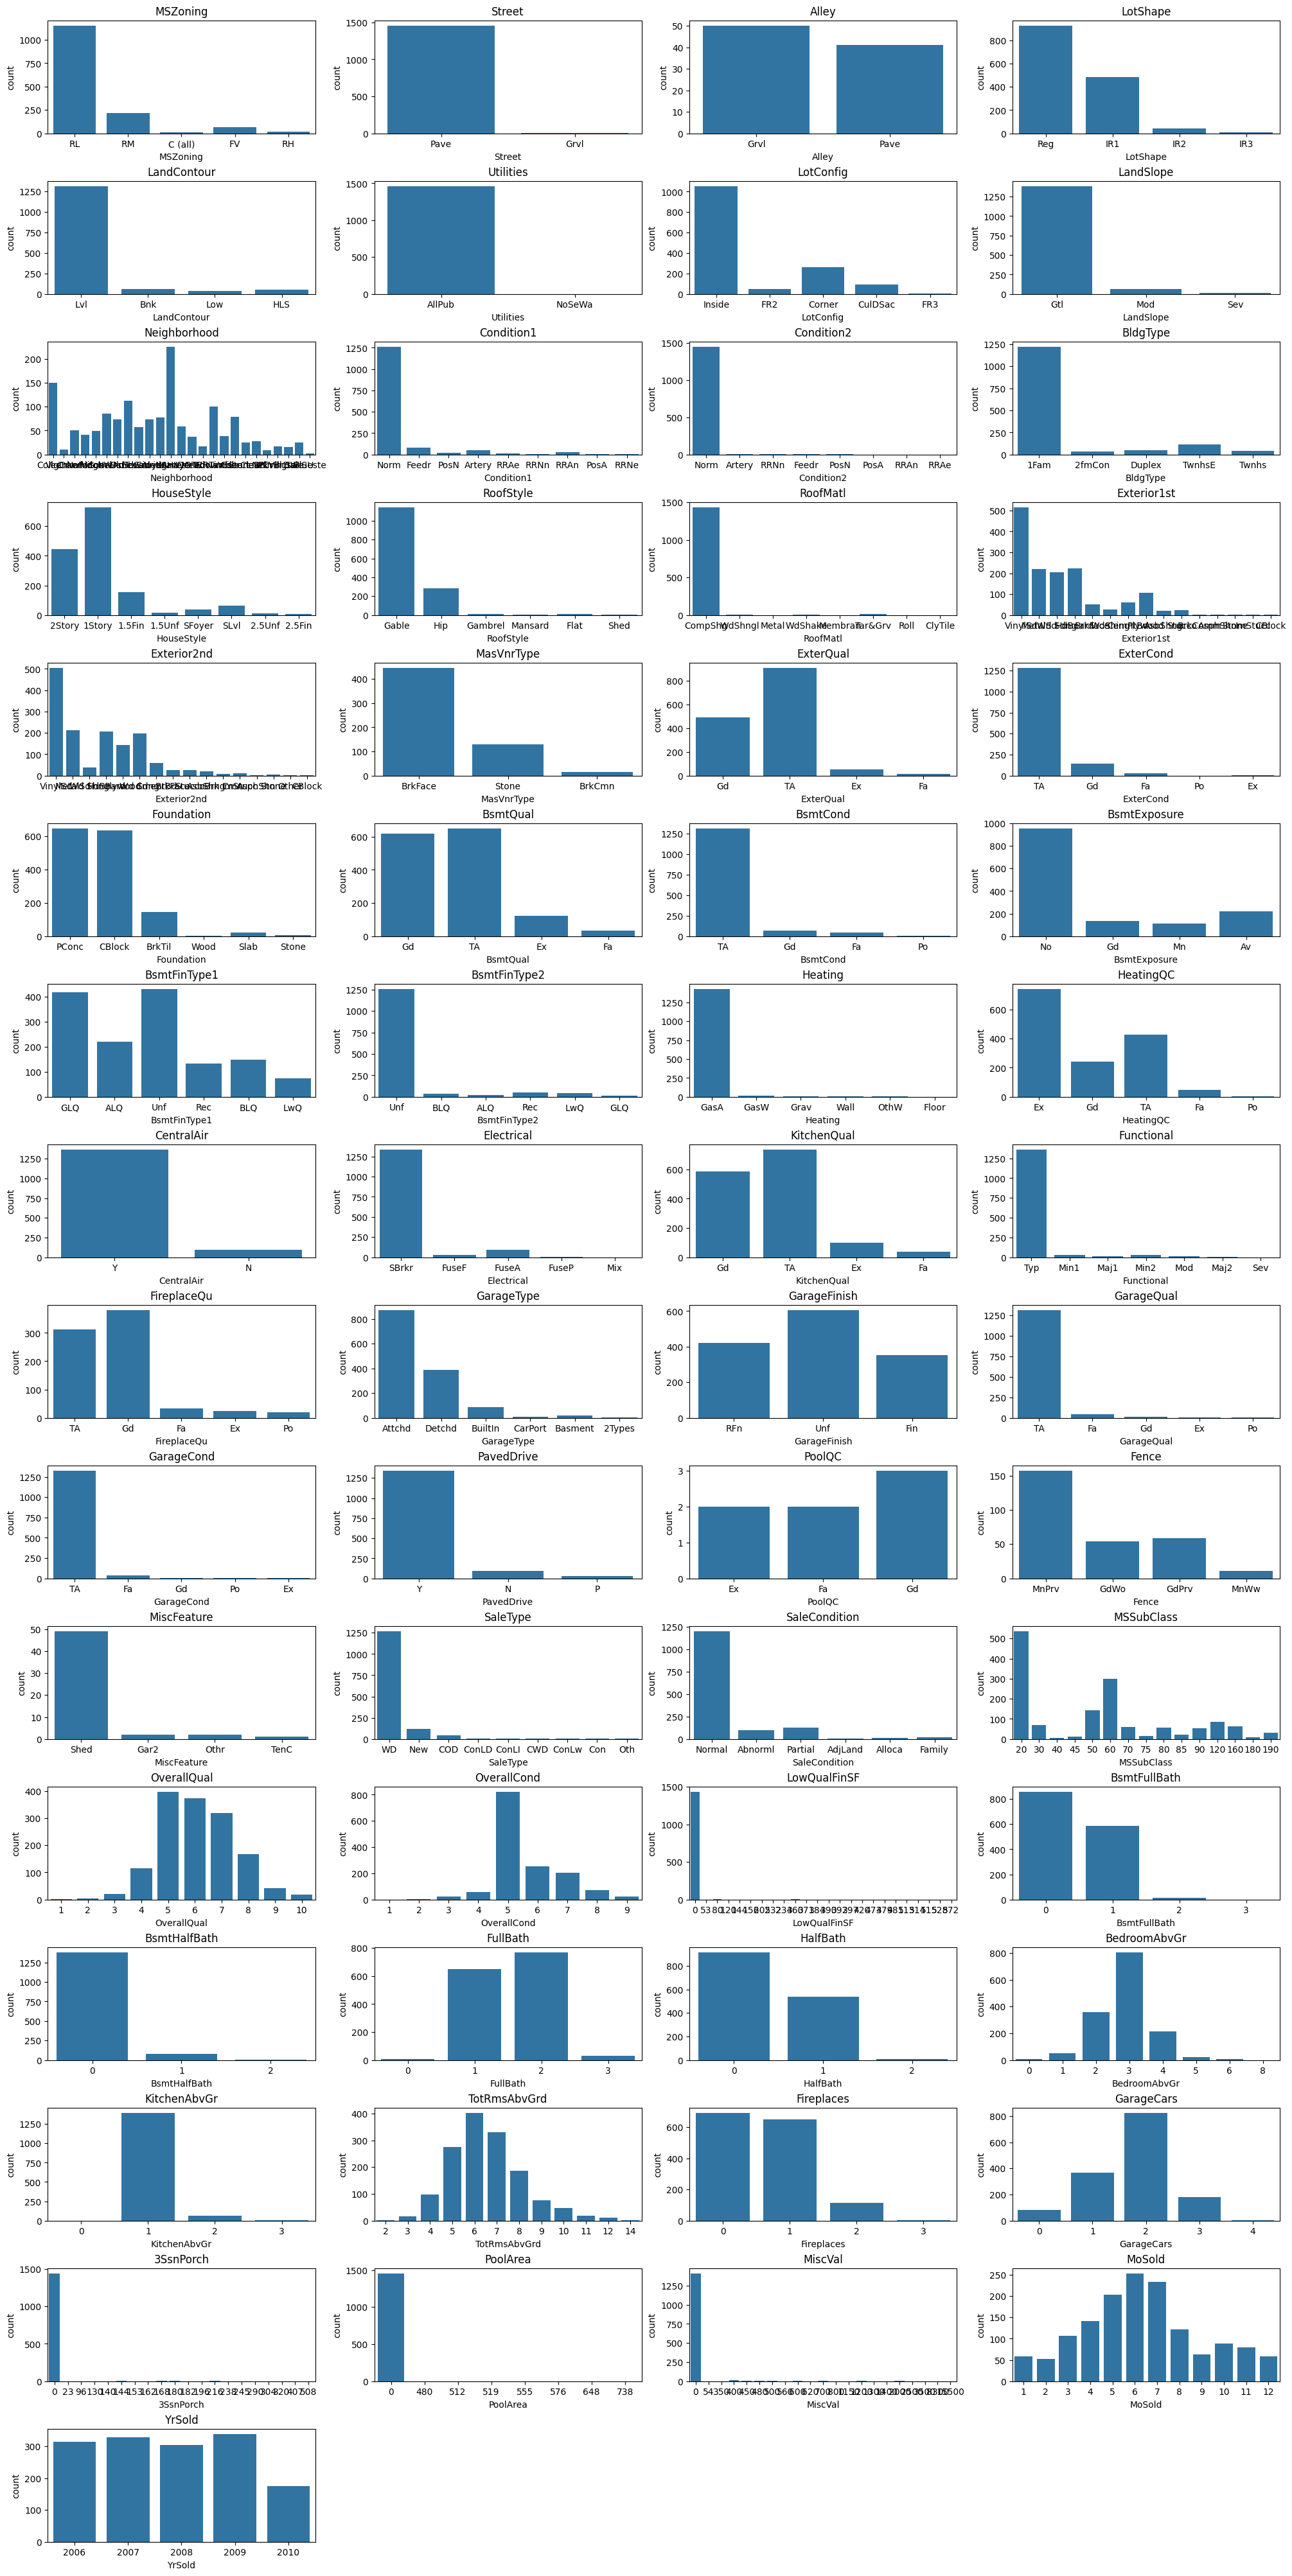

In [73]:
plot_multiple_charts(cat_features_house_prices)